<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [7]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [43]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

<AxesSubplot:xlabel='month_number', ylabel='total_profit'>

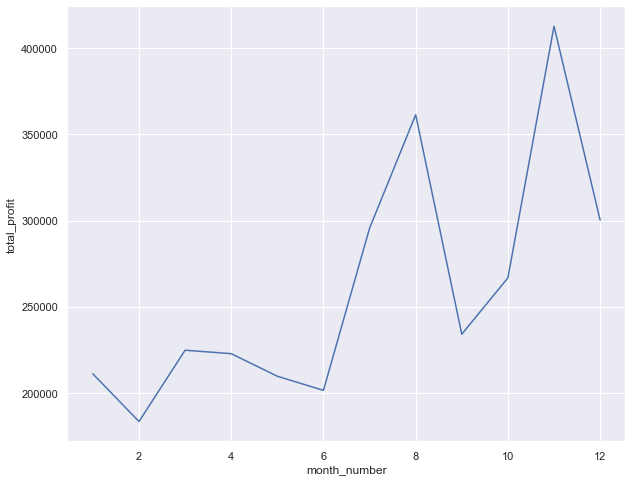

In [34]:
# grafico de linea
sns.lineplot(
    x='month_number',
    y='total_profit',
    data=df)   

<AxesSubplot:xlabel='month_number', ylabel='total_profit'>

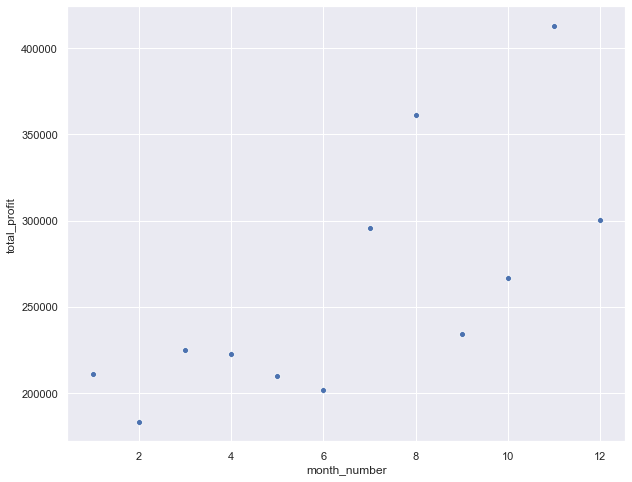

In [35]:
sns.scatterplot(
    x='month_number',
    y='total_profit',
    data=df)   

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

<AxesSubplot:xlabel='month_number', ylabel='valor'>

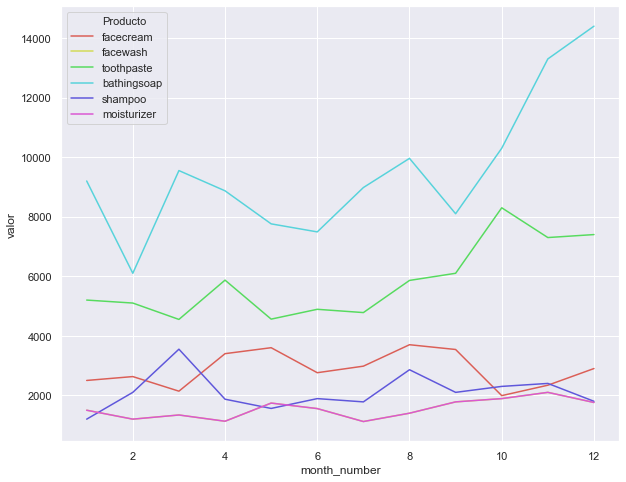

In [107]:
df_melt = pd.melt(df, 
        id_vars=['month_number'],
        value_vars=[
            'facecream', 'facewash', 'toothpaste',
            'bathingsoap','shampoo', 'moisturizer'],
        var_name='Producto',
        value_name='valor',
       )
#se "meltea" el dataframe para poder clasificarlo directamente en el grafico mediante el "hue"
sns.lineplot(
    x='month_number',
    y='valor',
    hue='Producto',# 
    data=df_melt,
    ci = None,
    palette=palette
    )   

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

In [45]:
df_sum_facecream_facewash = df.drop(['month_number', 'total_units', 'total_profit',
                         'toothpaste','bathingsoap','shampoo','moisturizer'],
                        axis=1).agg({sum})
# se le quitan las columnas no reelevantes para el caso

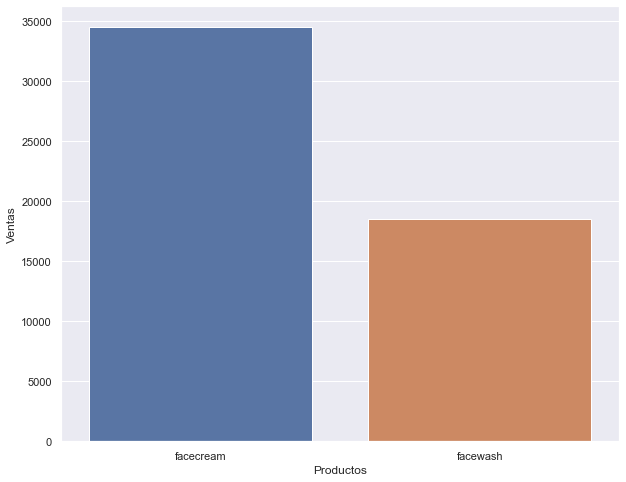

In [54]:
grafico = sns.barplot(data=df_sum_facecream_facewash)
plt.xlabel("Productos")
plt.ylabel("Ventas")
plt.show(grafico)

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

<AxesSubplot:>

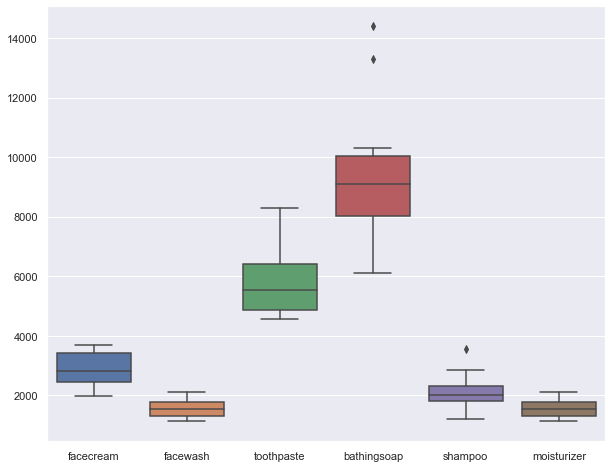

In [22]:
df_productos = df.drop(['month_number', 'total_units', 'total_profit'], axis=1)
# se quitan las columnas que no son los productos
sns.boxplot(data=df_productos)

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

In [114]:
# se quitan las columnas que no son productos y se realiza la suma por columnas con .agg({sum})
df_sum_prodct = df.drop(['month_number', 'total_units', 'total_profit'], axis=1).agg({sum})
df_sum_prodct

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
sum,34480,18515,69910,114010,25410,18515


([<matplotlib.patches.Wedge at 0x213997900c8>,
 [Text(1.0191857113582774, 0.4138363030995739, 'facecream'),
  Text(0.6140655913722997, 0.912646398936953, 'facewash'),
  Text(-0.4252111998343268, 1.0144926986112084, 'toothpaste'),
  Text(-0.6978920809686103, -0.8502626907734472, 'bathingsoap'),
  Text(0.8424027164269658, -0.7073596421598204, 'shampoo'),
  Text(1.0764907254787095, -0.226202824823922, 'moisturizer')],
 [Text(0.5559194789226967, 0.22572889259976756, '12%'),
  Text(0.3349448680212543, 0.4978071266928834, '7%'),
  Text(-0.2319333817278146, 0.5533596537879318, '25%'),
  Text(-0.38066840780106015, -0.4637796495127893, '41%'),
  Text(0.459492390778345, -0.3858325320871747, '9%'),
  Text(0.5871767593520233, -0.12338335899486653, '7%')])

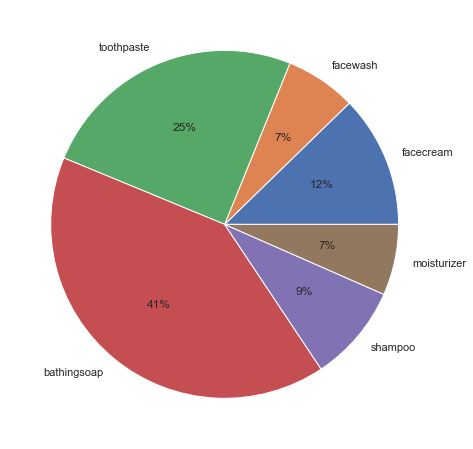

In [118]:
plt.pie(df_sum_prodct.values[0], 
        labels = df_sum_prodct.columns,
       autopct = '%0.0f%%')
# se grafican los valores de df_sum_product: df_sum_product.values[0], con sus respectivos labels : df_sum_prodct.columns